In [1]:
%load_ext autoreload
%autoreload 2

In [27]:
from models import *
import networkx
import pylab as pl

%matplotlib inline
pl.style.use('latexplot')

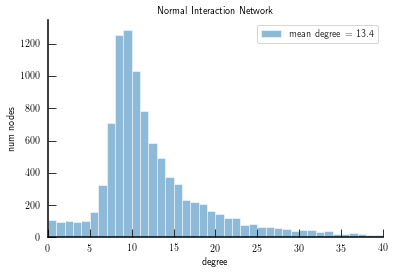

In [4]:
numNodes  = 10000
baseGraph = networkx.barabasi_albert_graph(n=numNodes, m = 9)
# Baseline normal interactions:
G_normal  = custom_exponential_graph(baseGraph, scale=100)
pl.title('Normal Interaction Network')
plot_degree_distn(G_normal, max_degree=40)

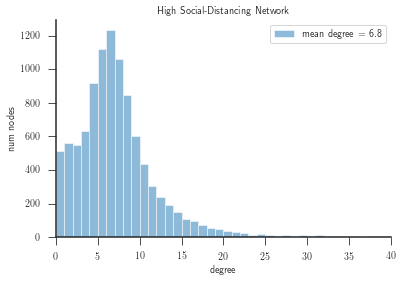

In [5]:
G_distancing2 = custom_exponential_graph(baseGraph, scale=20)
# Social distancing interactions:
G_distancing = custom_exponential_graph(baseGraph, scale=10)
pl.title('High Social-Distancing Network')
plot_degree_distn(G_distancing2, max_degree=40)

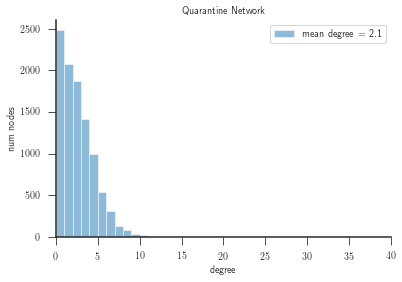

In [6]:
# Quarantine interactions:
G_quarantine = custom_exponential_graph(baseGraph, scale=5)
pl.title('Quarantine Network')
plot_degree_distn(G_quarantine, max_degree=40)

In [7]:
# Parameter Values
beta_I = 0.147
# Assuming asymptomatic carriers are less contagious due to the lack of symptom, we consider a lower value. 
# However, they are testing less frequently and can be dangerous due to this
beta_A = 0.12
# After detection, a symptomatic carrier is less likely to spread the disease:
beta_DI = 0.06
# This would be even lower considering asymptomatic cases:
beta_DA = 0.04

# E to I/A:
p_a     = 0.2
sigma   = 1/5.2
sigma_D = 1/5.2

# Assuming that all carriers take the same amount of time to recover
gamma_I = 1/12.39
gamma_A = 1/12.39
gamma_DI = 1/12.39
gamma_DA = 1/12.39

# We have a much lower death rate for asymptomatic carriers
mu_I = 0.0004
mu_A = 0.00001
mu_DI = 0.0004
mu_DA = 0.00001

# Rate of re-susceptibility:
xi = 0.0001

# For testing(it is easier to test for symptomatic individuals):
psi_E = 0.95
psi_I = 1
psi_A = 0.95

In [32]:
# At the start there is no testing happening, and the disease progagates unhindered 
model = NetworkModel(G = G_normal,
                     beta_I = beta_I,
                     beta_A = beta_A,
                     beta_DI = beta_DI,
                     beta_DA = beta_DA,
                     p_a = p_a,
                     sigma = sigma,
                     sigma_D = sigma_D,
                     gamma_I = gamma_I,
                     gamma_A = gamma_A,
                     gamma_DI = gamma_DI,
                     gamma_DA = gamma_DA,
                     mu_I = mu_I,
                     mu_A = mu_A,
                     mu_DI = mu_DI,
                     mu_DA = mu_DA,
                     p = 0.5, #locality parameter
                     Q = G_quarantine, 
                     psi_E =psi_E, 
                     psi_I =psi_I,
                     psi_A =psi_A,
                     q     =0.5, # additional quarantining probability
                     initI =400, 
                     initA =100, 
                    )

# At the start there is no testing happening, and the disease progagates unhindered 
model2 = NetworkModel(G = G_normal,
                     beta_I = beta_I,
                     beta_A = beta_A,
                     beta_DI = beta_DI,
                     beta_DA = beta_DA,
                     p_a = p_a,
                     sigma = sigma,
                     sigma_D = sigma_D,
                     gamma_I = gamma_I,
                     gamma_A = gamma_A,
                     gamma_DI = gamma_DI,
                     gamma_DA = gamma_DA,
                     mu_I = mu_I,
                     mu_A = mu_A,
                     mu_DI = mu_DI,
                     mu_DA = mu_DA,
                     p = 0.5, #locality parameter
                     Q = G_quarantine, 
                     psi_E =psi_E, 
                     psi_I =psi_I,
                     psi_A =psi_A,
                     q     =0.5, # additional quarantining probability
                     initI =400, 
                     initA =100, 
                    )

In [33]:
checkpoints = {'t':[20, 56, 84, 112], 
               'G':[G_distancing, G_normal, G_distancing, G_normal], 
               'p':[0.1, 0.8, 0.1, 0.8], 
              }

checkpoints2 = {'t': [20, 56, 112], 
               'G':  [G_distancing, G_distancing, G_normal], 
               'p':  [0.1, 0.4, 0.8], 
              }


### Running the simulation

In [34]:
model.run(T=300, checkpoints=checkpoints)

t = 0.00
t = 10.00
[Checkpoint: Updating parameters]
t = 20.00
t = 30.01
t = 40.00
t = 50.01
[Checkpoint: Updating parameters]
t = 60.00
t = 70.00
t = 80.00
[Checkpoint: Updating parameters]
t = 90.01
t = 100.02
t = 110.01
[Checkpoint: Updating parameters]
t = 120.02
t = 130.02
t = 140.01
t = 150.02
t = 160.06
t = 170.19
t = 180.00
t = 190.07
t = 200.15
t = 210.08
t = 220.04
t = 230.10
t = 240.00
t = 250.11
t = 260.14
t = 270.11
t = 280.50
t = 290.10


True

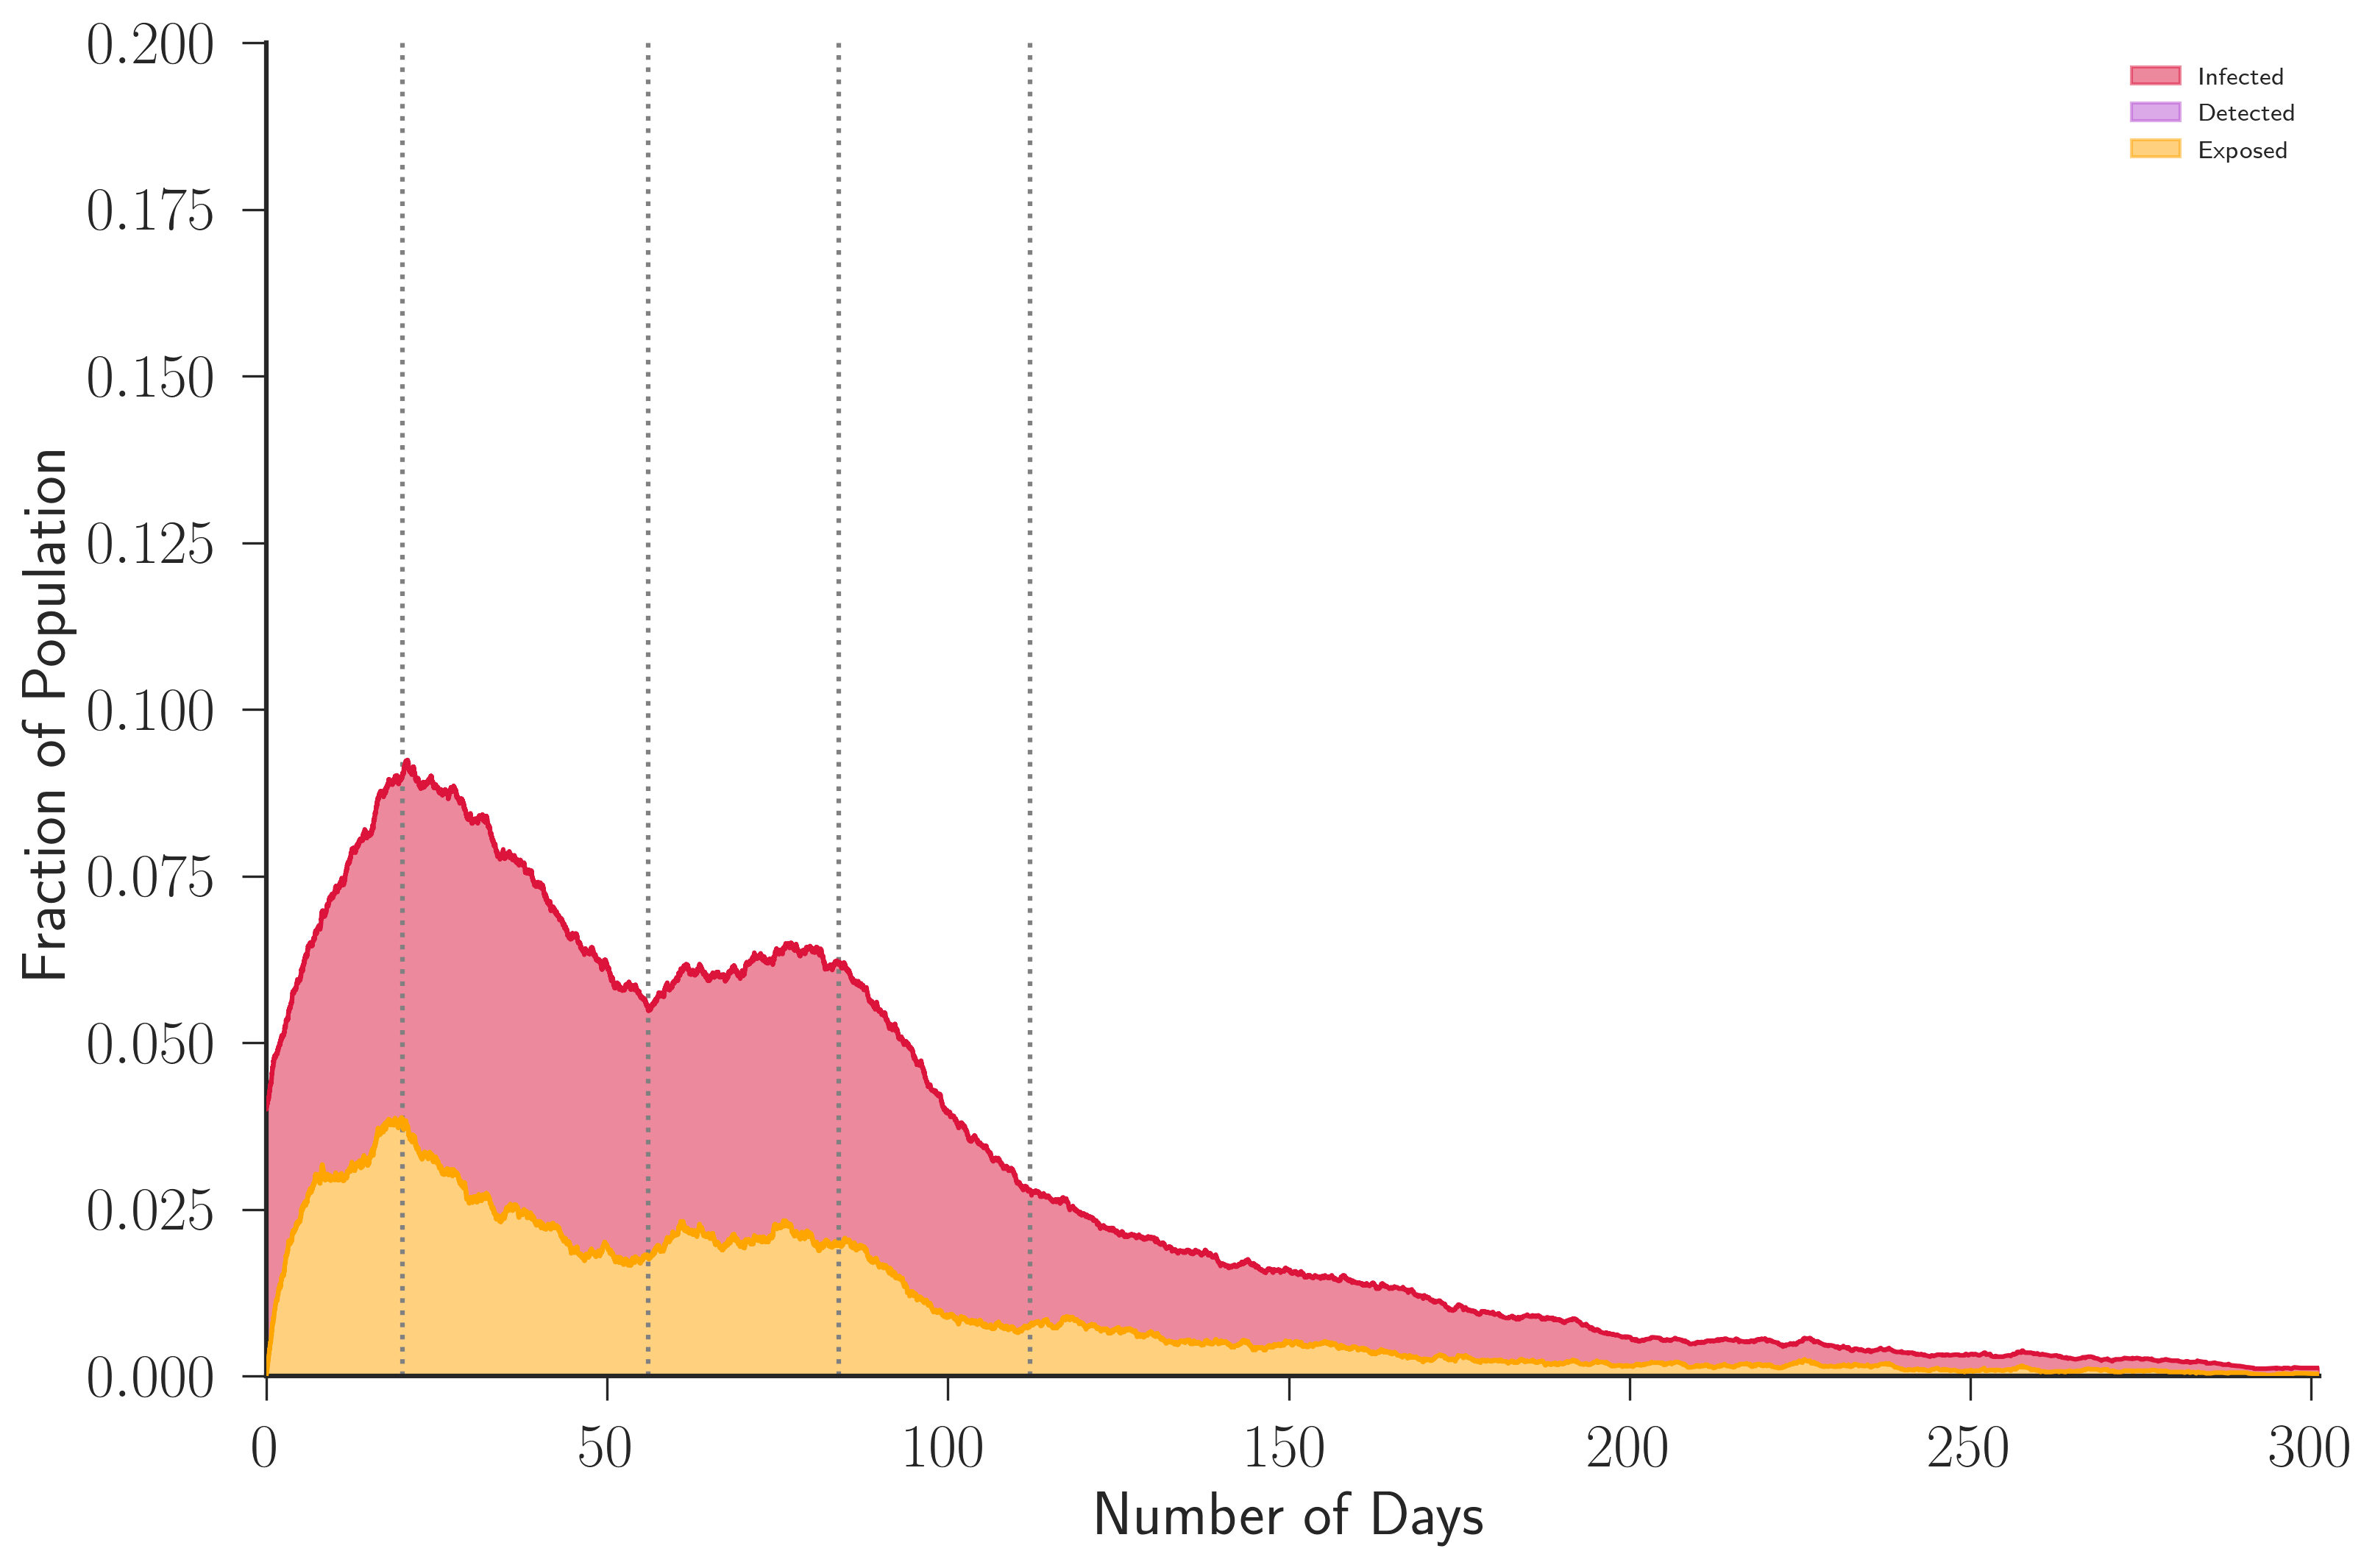

(<Figure size 3600x2400 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fada589ba90>)

In [35]:
model.figure_infections(vlines=checkpoints['t'], ylim=0.002)

In [37]:
model2.run(T=300, checkpoints=checkpoints2)

t = 0.00
t = 10.00
[Checkpoint: Updating parameters]
t = 20.01
t = 30.01
t = 40.00
t = 50.01
[Checkpoint: Updating parameters]
t = 60.01
t = 70.00
t = 80.03
t = 90.01
t = 100.04
t = 110.01
[Checkpoint: Updating parameters]
t = 120.00
t = 130.01
t = 140.01
t = 150.07
t = 160.11
t = 170.00
t = 180.03
t = 190.02
t = 200.02
t = 210.12
t = 220.32
t = 230.85
t = 240.50
t = 270.09
t = 280.75


True

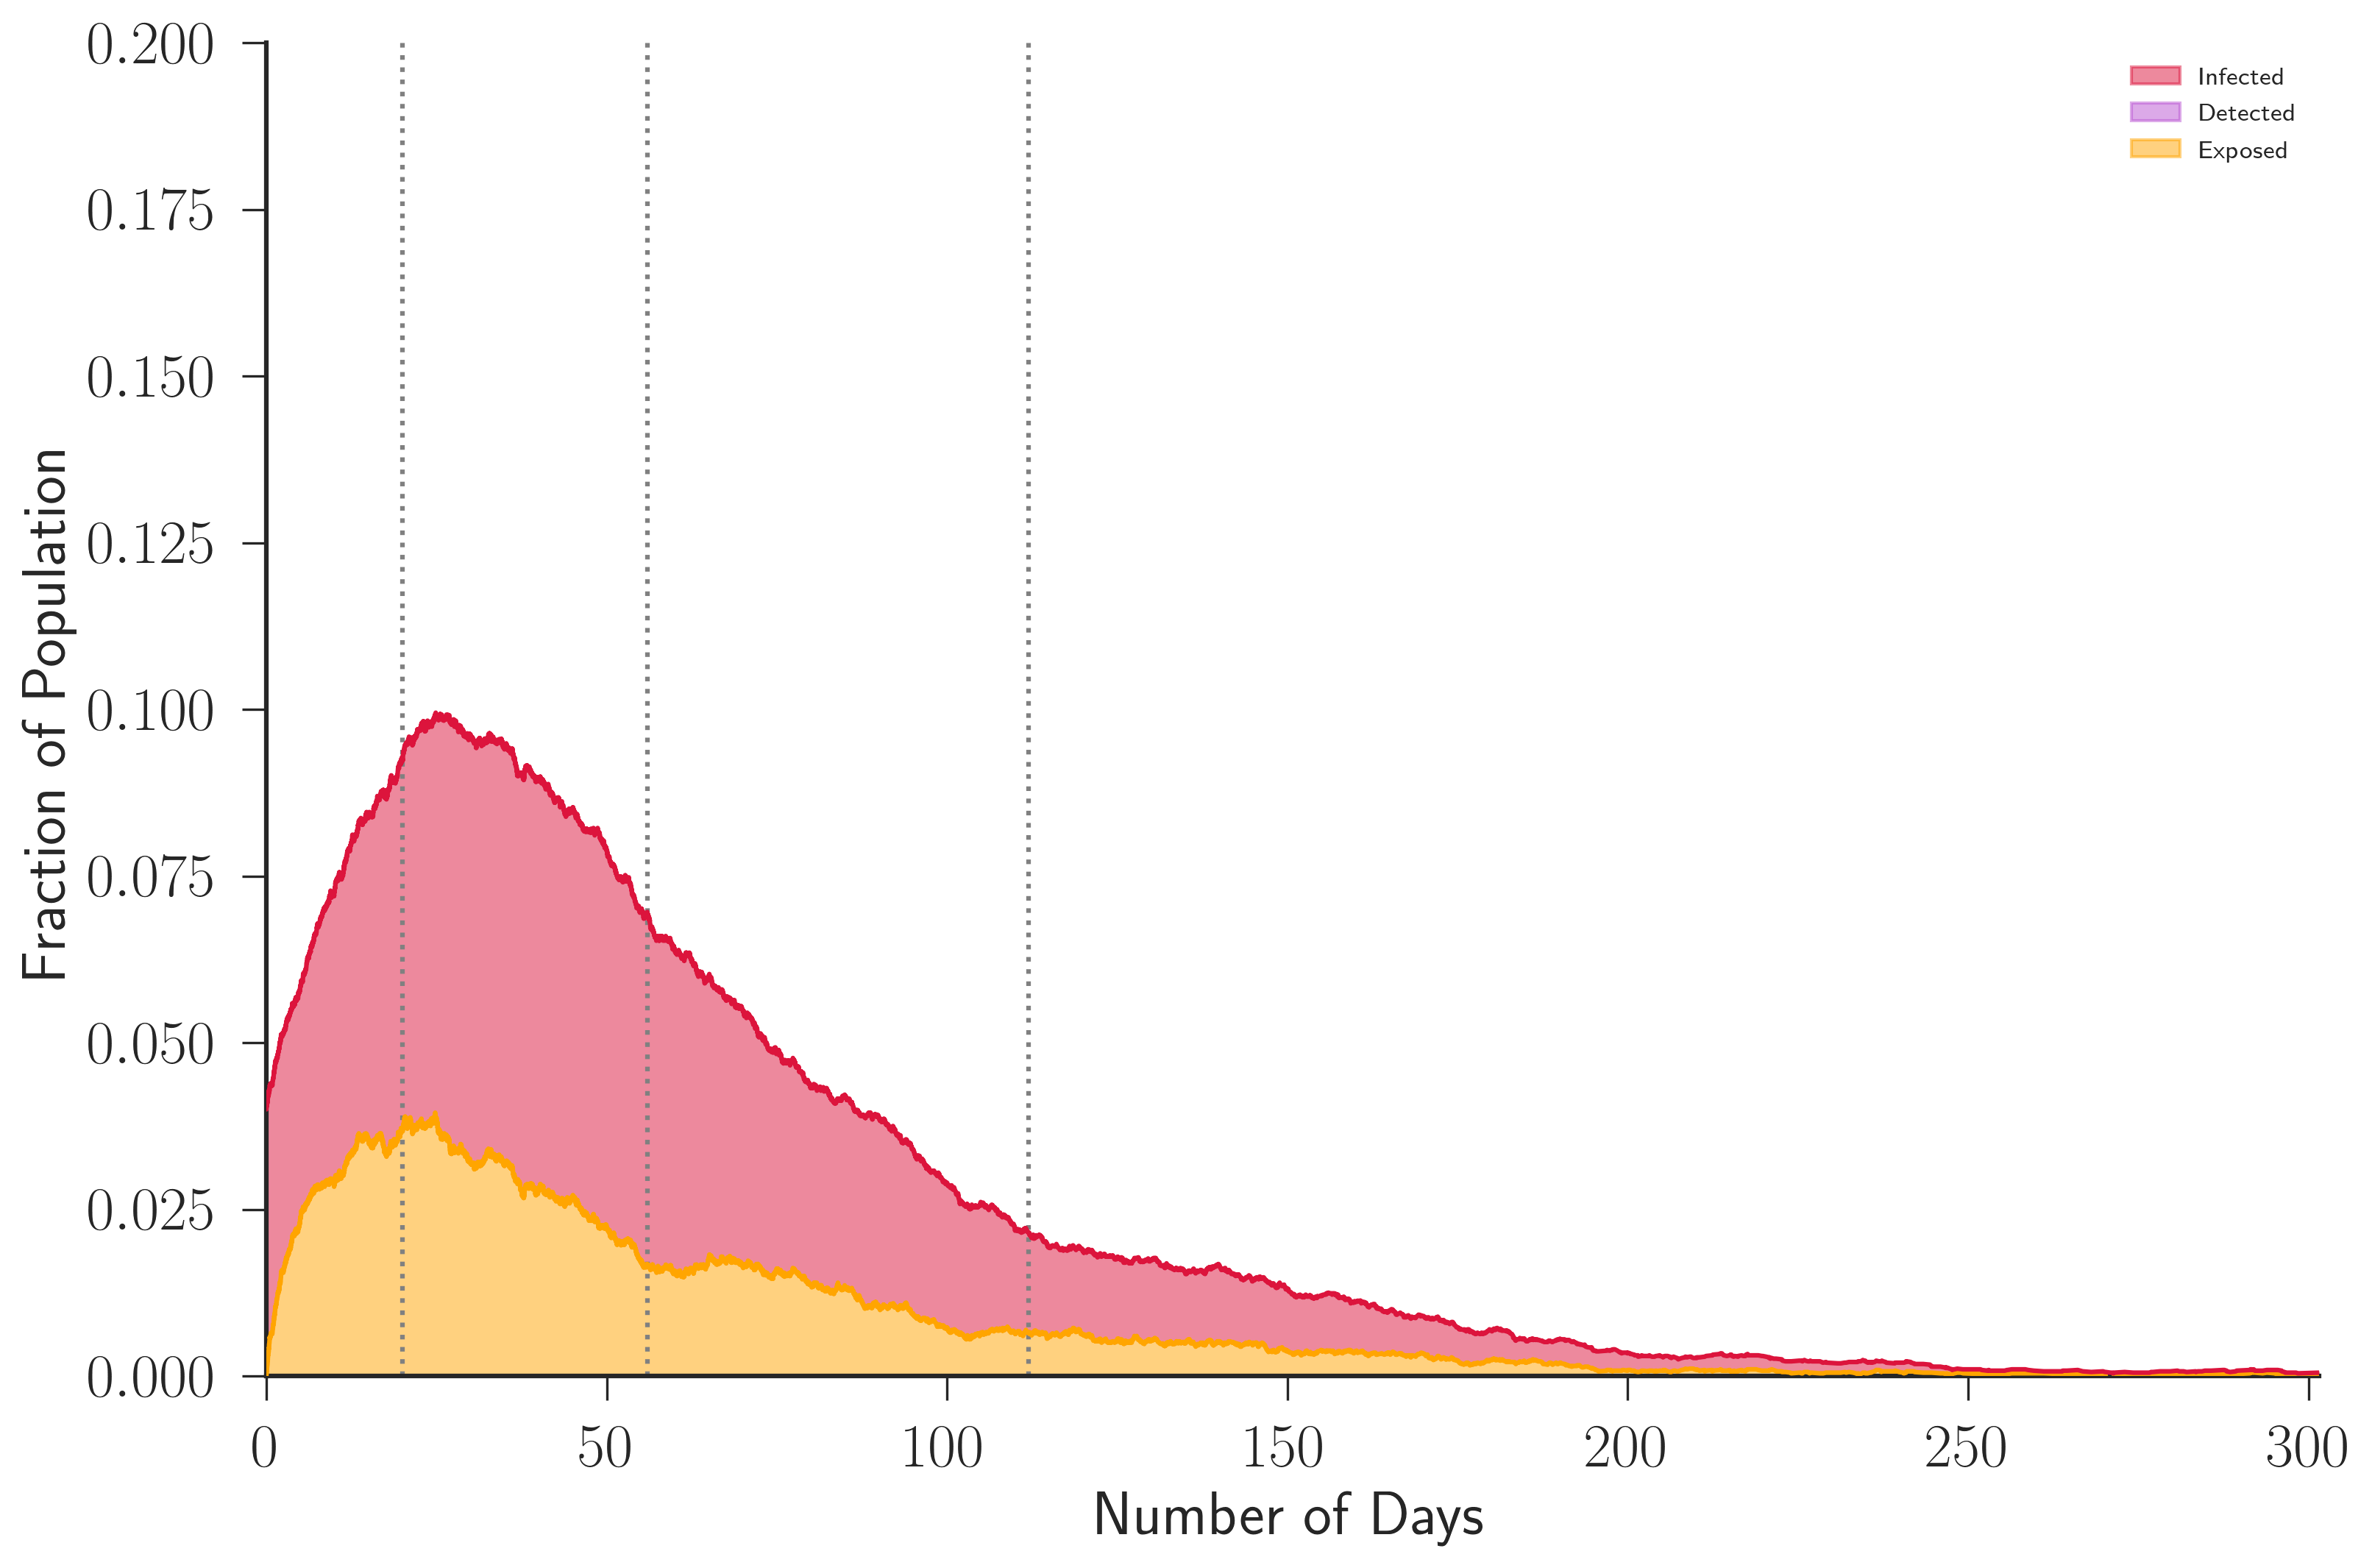

(<Figure size 3600x2400 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fada57ddda0>)

In [38]:
model2.figure_infections(vlines=checkpoints2['t'], ylim=0.002)

In [ ]:
ref_model = SEIRSNetworkModel(G       =G_normal, 
                          beta    =0.155, 
                          sigma   =1/5.2, 
                          gamma   =1/12.39, 
                          mu_I    =0.0004,
                          mu_0    =0, 
                          nu      =0, 
                          xi      =0,
                          p       =0.5,
                          Q       =G_quarantine, 
                          beta_D  =0.155, 
                          sigma_D =1/5.2, 
                          gamma_D =1/12.39, 
                          mu_D    =0.0004,
                          theta_E =0, 
                          theta_I =0, 
                          phi_E   =0, 
                          phi_I   =0, 
                          psi_E   =1.0, 
                          psi_I   =1.0,
                          q       =0.5,
                          initI   =numNodes/100, 
                          initE   =0, 
                          initD_E =0, 
                          initD_I =0, 
                          initR   =0, 
                          initF   =0)
ref_model.run(T=300)

In [39]:
# At the start there is no testing happening, and the disease progagates unhindered 
model = NetworkModel(G = G_normal,
                     beta_I = beta_I,
                     beta_A = beta_A,
                     beta_DI = beta_DI,
                     beta_DA = beta_DA,
                     p_a = p_a,
                     sigma = sigma,
                     sigma_D = sigma_D,
                     gamma_I = gamma_I,
                     gamma_A = gamma_A,
                     gamma_DI = gamma_DI,
                     gamma_DA = gamma_DA,
                     mu_I = mu_I,
                     mu_A = mu_A,
                     mu_DI = mu_DI,
                     mu_DA = mu_DA,
                     p = 0.5, #locality parameter
                     Q = G_quarantine, 
                     psi_E =psi_E, 
                     psi_I =psi_I,
                     psi_A =psi_A,
                     q     =0.5, # additional quarantining probability
                     initI =400, 
                     initA =100, 
                    )

# At the start there is no testing happening, and the disease progagates unhindered 
model2 = NetworkModel(G = G_normal,
                     beta_I = beta_I,
                     beta_A = beta_A,
                     beta_DI = beta_DI,
                     beta_DA = beta_DA,
                     p_a = 0.5,
                     sigma = sigma,
                     sigma_D = sigma_D,
                     gamma_I = gamma_I,
                     gamma_A = gamma_A,
                     gamma_DI = gamma_DI,
                     gamma_DA = gamma_DA,
                     mu_I = mu_I,
                     mu_A = mu_A,
                     mu_DI = mu_DI,
                     mu_DA = mu_DA,
                     p = 0.5, #locality parameter
                     Q = G_quarantine, 
                     psi_E =psi_E, 
                     psi_I =psi_I,
                     psi_A =psi_A,
                     q     =0.5, # additional quarantining probability
                     initI =400, 
                     initA =400, 
                    )

In [40]:
model.run(T=300)
model2.run(T=300)

t = 0.00
t = 10.01
t = 20.01
t = 30.03
t = 40.01
t = 50.00
t = 60.00
t = 70.00
t = 80.01
t = 90.01
t = 100.03
t = 110.02
t = 120.03
t = 130.00
t = 140.04
t = 150.05
t = 160.05
t = 170.05
t = 180.05
t = 190.02
t = 200.54
t = 210.34
t = 220.24
t = 230.02
t = 240.37
t = 250.07
t = 260.17
t = 0.00
t = 10.00
t = 20.00
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.01
t = 80.00
t = 90.02
t = 100.01
t = 110.02
t = 120.03
t = 130.01
t = 140.03
t = 150.04
t = 160.07
t = 170.07
t = 180.17
t = 190.30
t = 220.89
t = 250.82


True

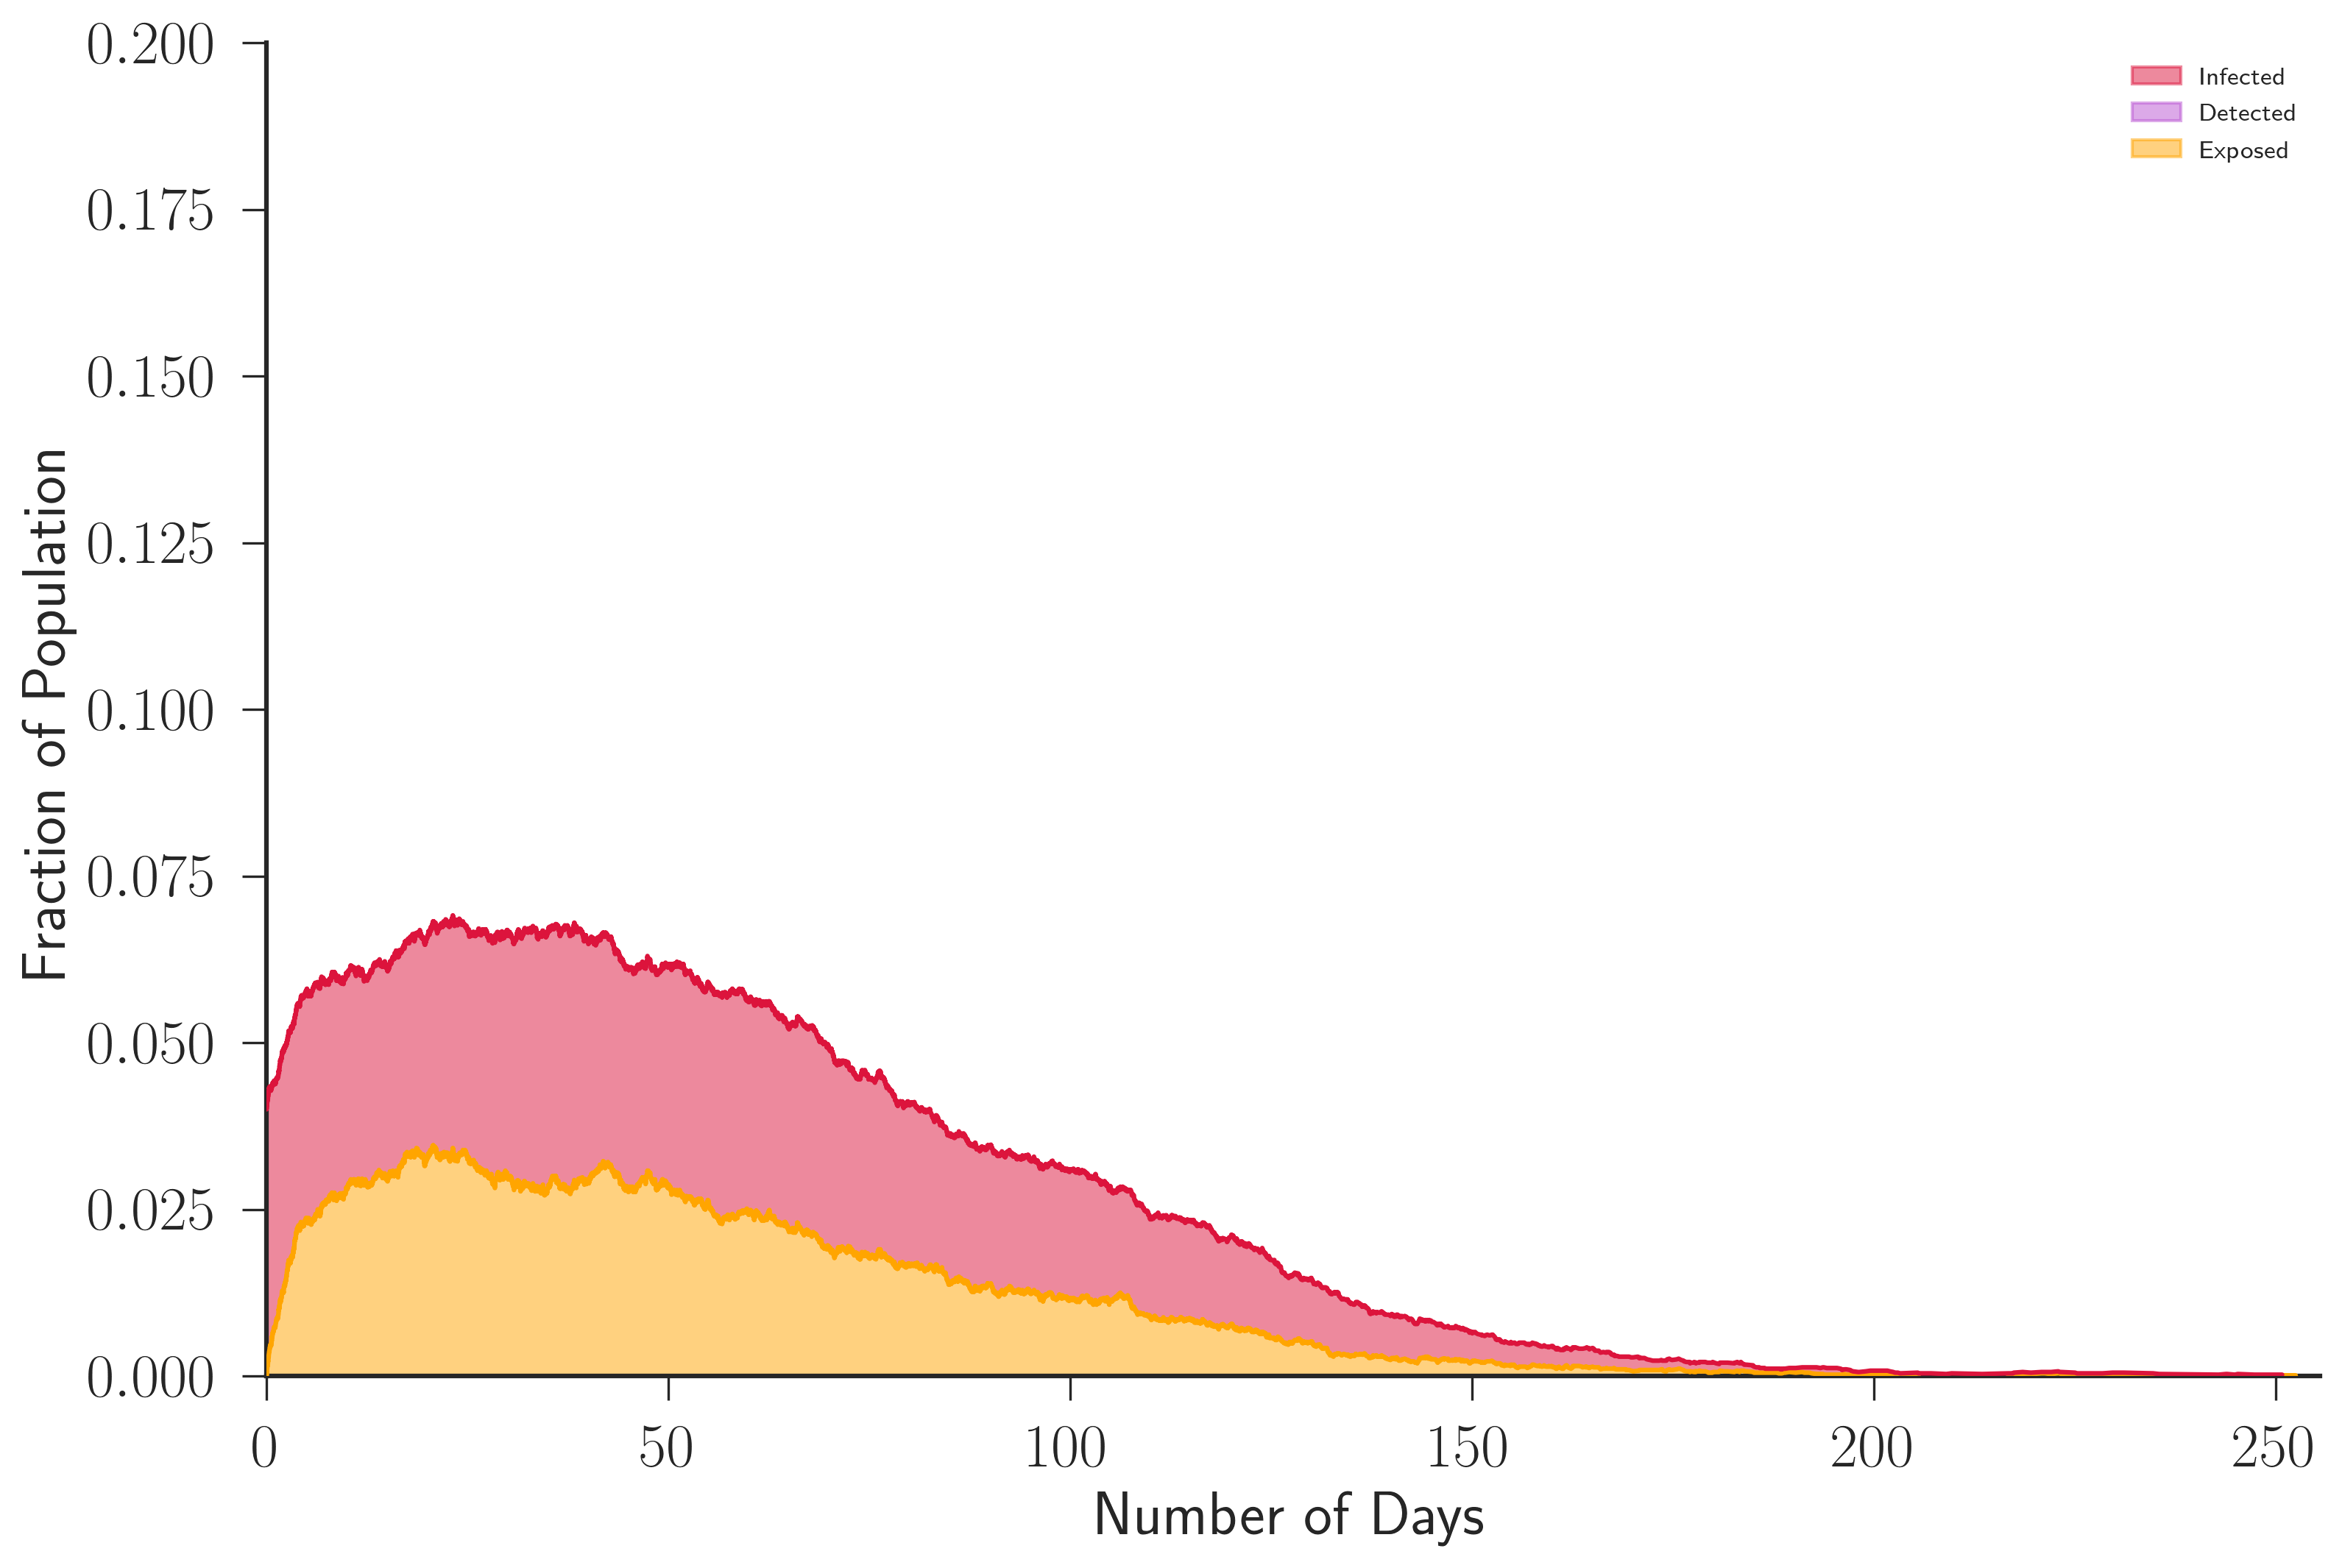

(<Figure size 3600x2400 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fada5a272e8>)

In [46]:
model2.figure_infections(ylim=0.002)

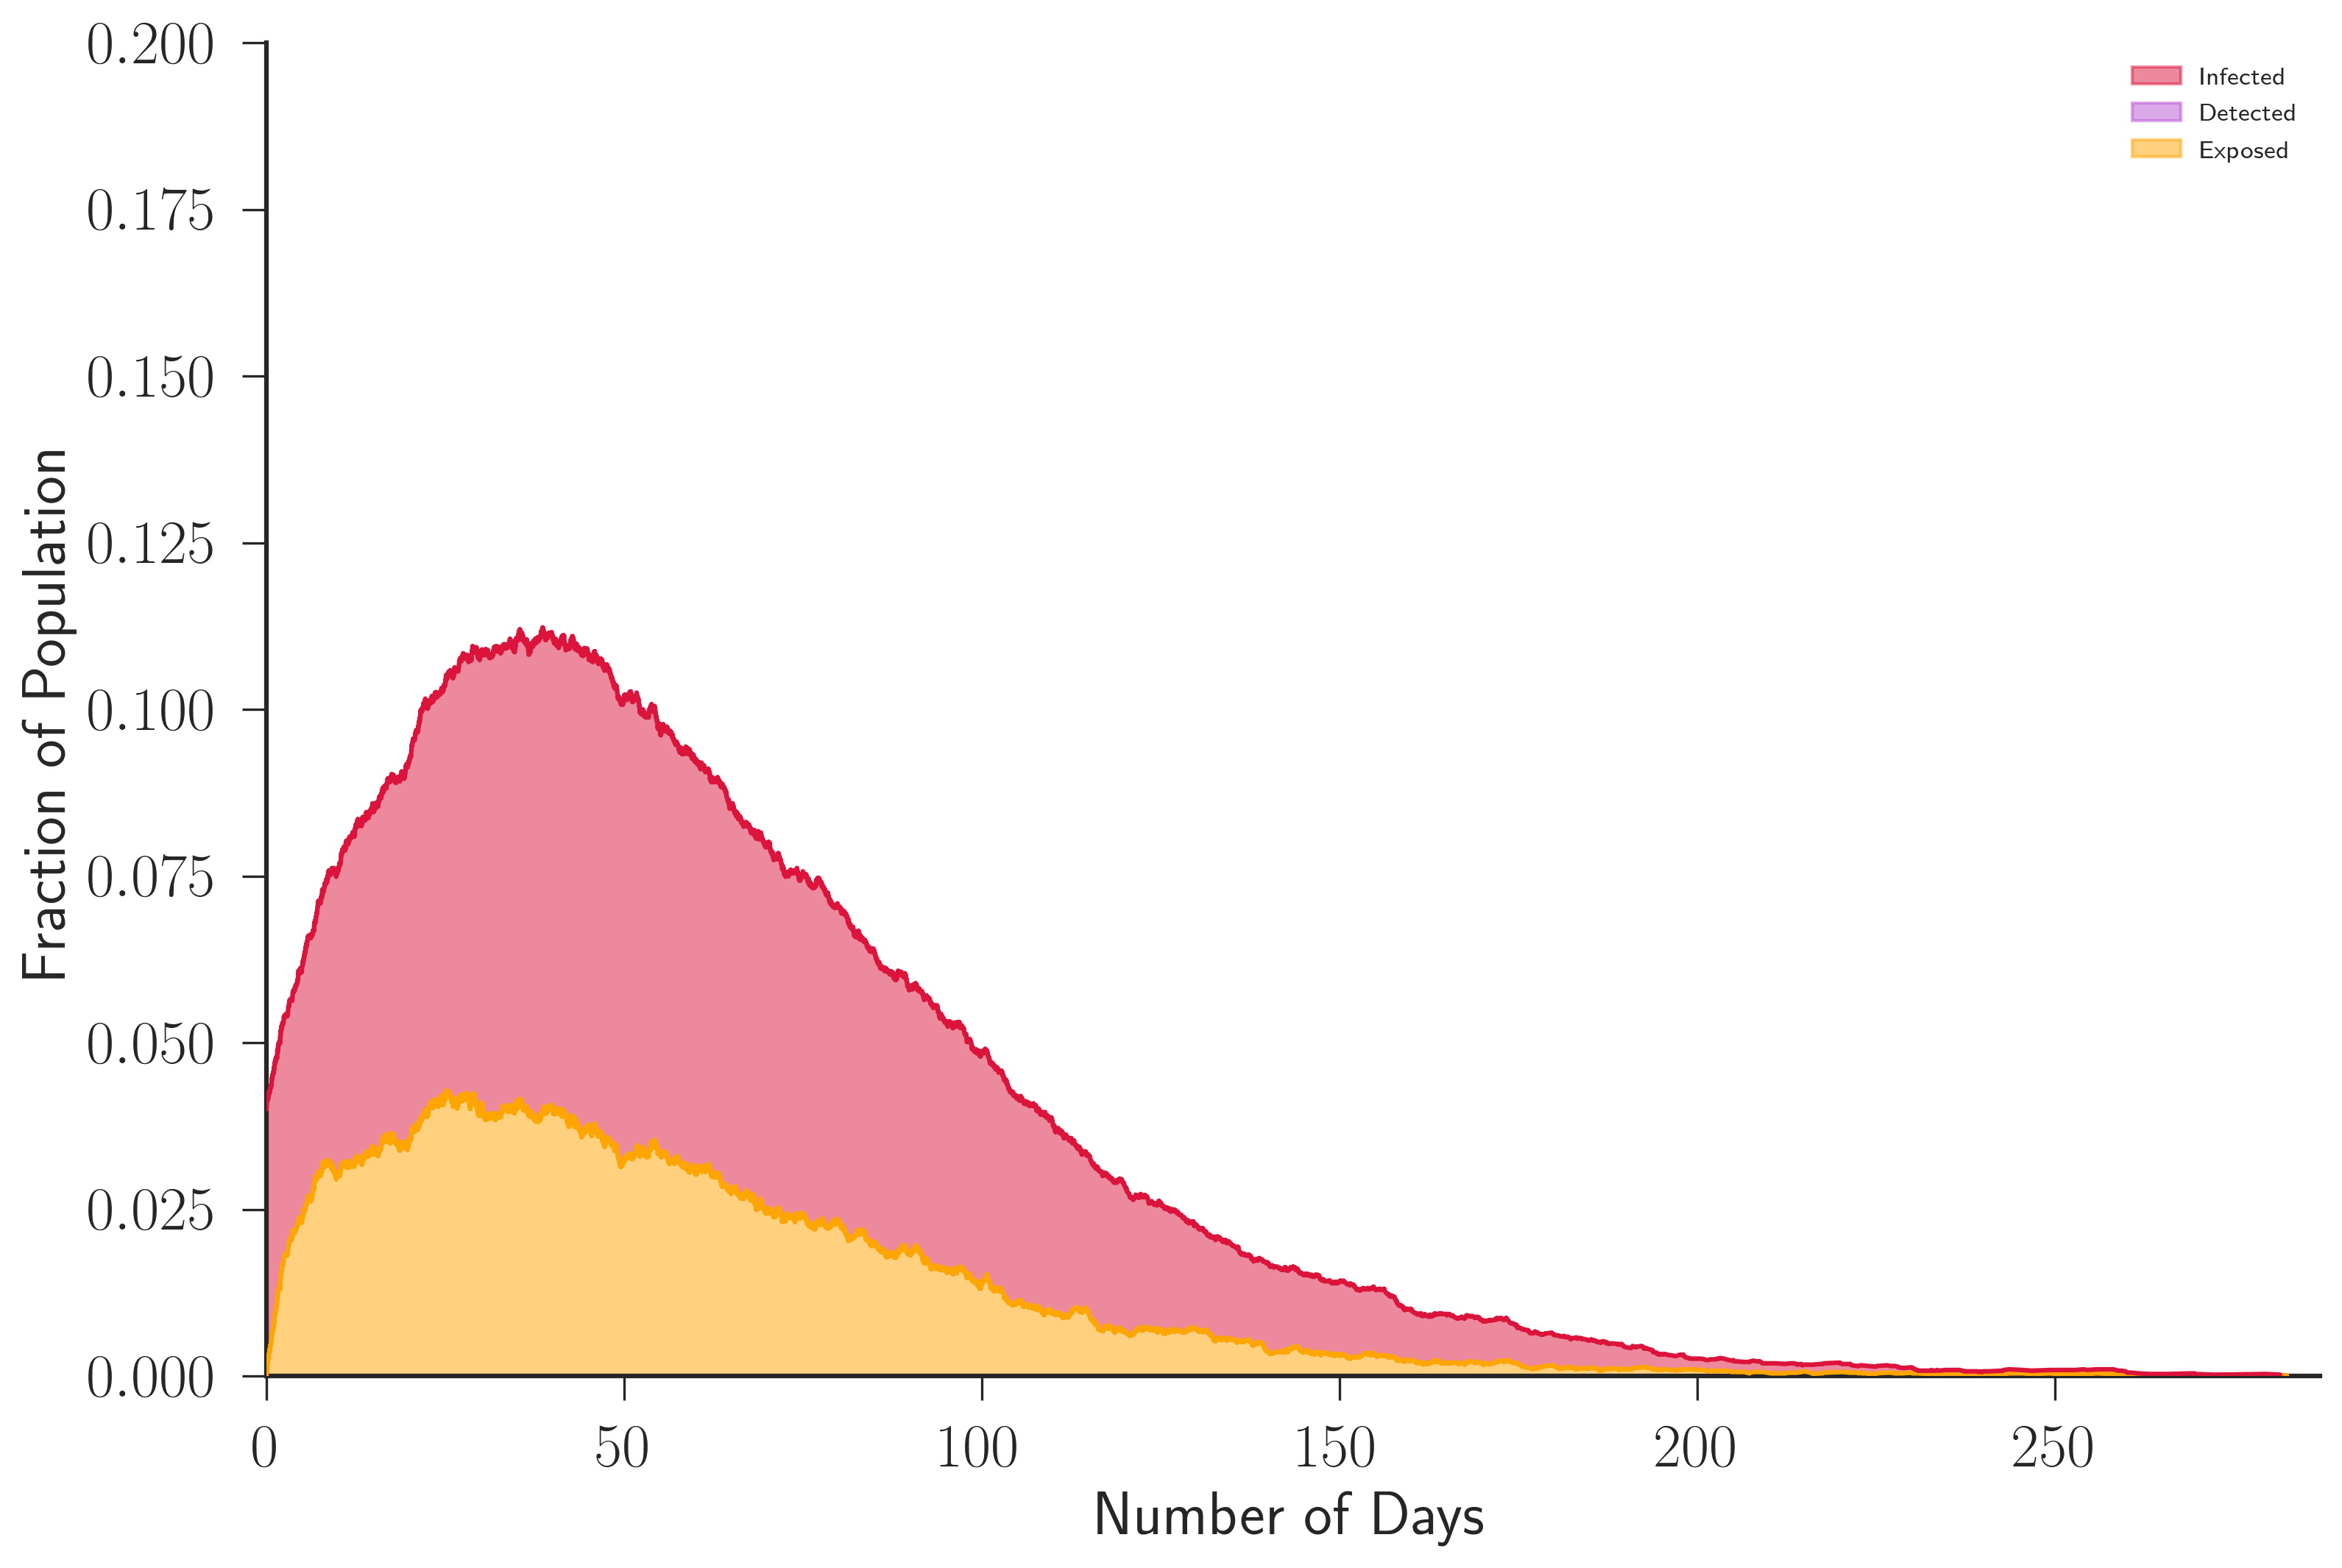

(<Figure size 3600x2400 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fada5703278>)

In [47]:
model.figure_infections(ylim=0.002)